In [10]:
%run functions.ipynb

np.set_printoptions(precision=3)
np.random.seed(42)

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['flatten']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding

In [3]:
X_train, X_test, y_train, y_test = load_train_and_test_parts()
print("Train and test sizes: {} {}".format(X_train.shape, X_test.shape))
print(
    "(1, 0) labels count in train test: {} {}".format(
        (np.count_nonzero(y_train == 1), np.count_nonzero(y_train == 0)),
        (np.count_nonzero(y_test == 1), np.count_nonzero(y_test == 0)),
    )
)
standarizer = StandardScaler().fit(X_train)
X_std_train = standarizer.transform(X_train)
X_std_test = standarizer.transform(X_test)

Train and test sizes: (726, 12179) (243, 12179)
(1, 0) labels count in train test: (289, 437) (104, 139)


# ISOMAP

In [4]:
logit_params = {'C' : [0.1, 0.3, 0.5, 0.7, 0.9], 'penalty' : ['l1', 'l2'], 'solver' : ['liblinear']}
tree_params = {'n_estimators': [100, 500, 2500], 'max_depth' : [2,4,8], 'min_samples_leaf' : [5, 10, 20]}
dim_params = {'n_components' : [50, 150, 240], 'n_neighbors' : [3, 5, 7, 9]}

isomap = Isomap()
logit = LogisticRegression()
tree = RandomForestClassifier()

/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
     steps=[('dim', Isomap(eigen_solver='auto', max_iter=None, n_components=50, n_jobs=None,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)), ('clf', LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])


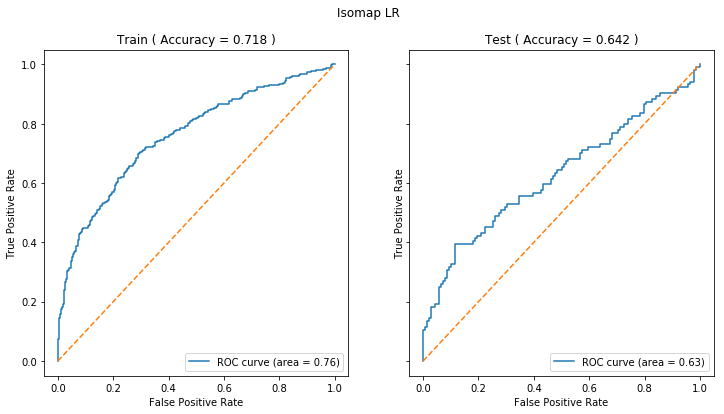

In [8]:
models_logit_iso = fit_dim_reduction_pipeline(isomap, logit, dim_params, logit_params, X_std_train, y_train, n_iter=30)
print(models_logit_iso.best_estimator_)
plot_clf_roc(models_logit_iso.best_estimator_, X_std_train, y_train, X_std_test, y_test, 'Isomap LR')

Pipeline(memory=None,
     steps=[('dim', Isomap(eigen_solver='auto', max_iter=None, n_components=50, n_jobs=None,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_le...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


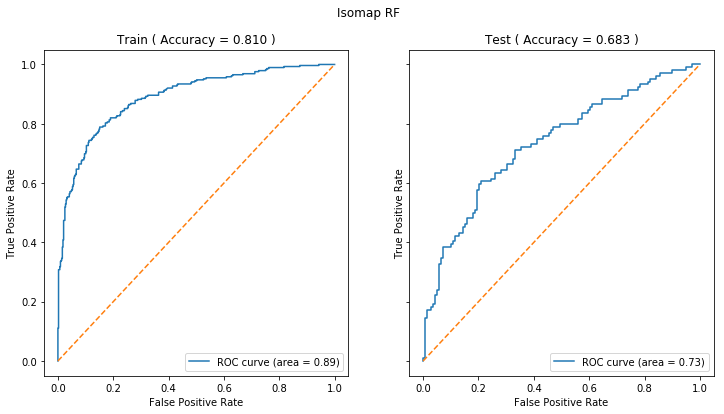

In [9]:
models_tree_iso = fit_dim_reduction_pipeline(isomap, tree, dim_params, tree_params, X_std_train, y_train, n_iter=30)
print(models_tree_iso.best_estimator_)
plot_clf_roc(models_tree_iso.best_estimator_, X_std_train, y_train, X_std_test, y_test, 'Isomap RF')

# LLE

In [11]:
dim_params = {'n_components' : [50, 150, 240], 'n_neighbors' : [3, 5, 7, 9], 'reg' : [0.001, 0.01, 0.1, 1, 10]}
lle = LocallyLinearEmbedding(max_iter=1000)
logit = LogisticRegression()
tree = RandomForestClassifier()

/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
     steps=[('dim', LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=1000,
            method='standard', modified_tol=1e-12, n_components=240,
            n_jobs=None, n_neighbors=7, neighbors_algorithm='auto',
            random_state=None, reg=0.001, tol=1e-06)), ('clf', Logist...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])


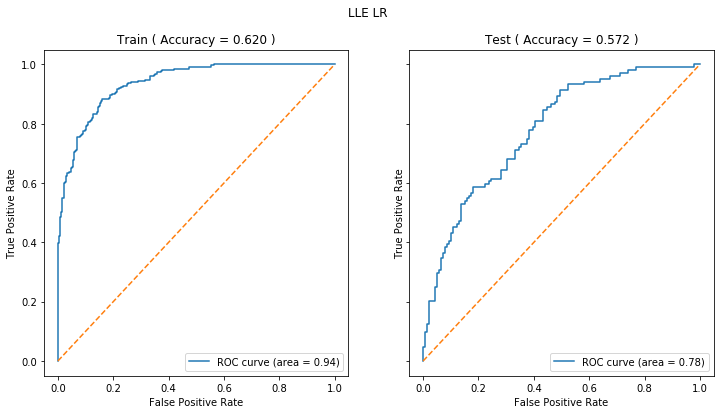

In [12]:
models_logit_lle = fit_dim_reduction_pipeline(lle, logit, dim_params, logit_params, X_std_train, y_train, n_iter=30)
print(models_logit_lle.best_estimator_)
plot_clf_roc(models_logit_lle.best_estimator_, X_std_train, y_train, X_std_test, y_test, 'LLE LR')

Pipeline(memory=None,
     steps=[('dim', LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=1000,
            method='standard', modified_tol=1e-12, n_components=50,
            n_jobs=None, n_neighbors=7, neighbors_algorithm='auto',
            random_state=None, reg=0.1, tol=1e-06)), ('clf', RandomFor...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


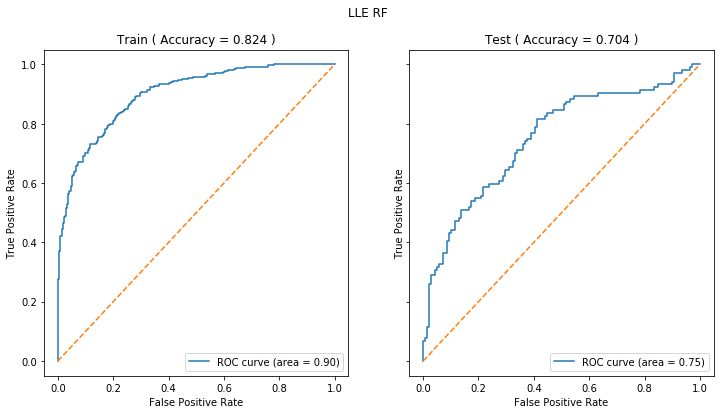

In [14]:
models_tree_lle = fit_dim_reduction_pipeline(lle, tree, dim_params, tree_params, X_std_train, y_train, n_iter=30)
print(models_tree_lle.best_estimator_)
plot_clf_roc(models_tree_lle.best_estimator_, X_std_train, y_train, X_std_test, y_test, 'LLE RF')

# PCA

In [15]:
dim_params = {'n_components' : [50, 250, 500]}
pca = PCA()

/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Pipeline(memory=None,
     steps=[('dim', PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])


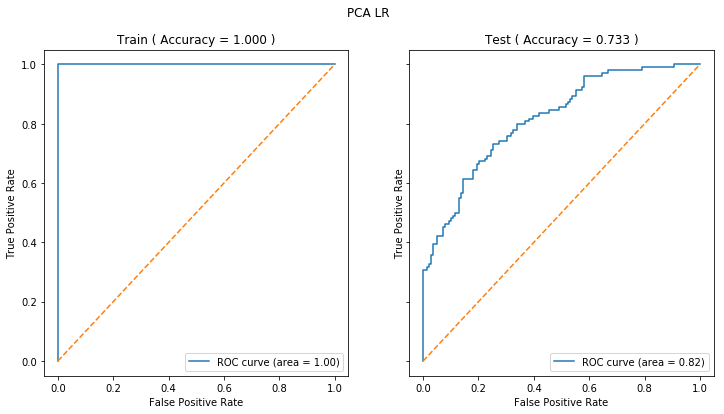

In [16]:
models_logit_pca = fit_dim_reduction_pipeline(pca, logit, dim_params, logit_params, X_std_train, y_train, n_iter=30)
print(models_logit_pca.best_estimator_)
plot_clf_roc(models_logit_pca.best_estimator_, X_std_train, y_train, X_std_test, y_test, 'PCA LR')

/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Pipeline(memory=None,
     steps=[('dim', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            mi...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


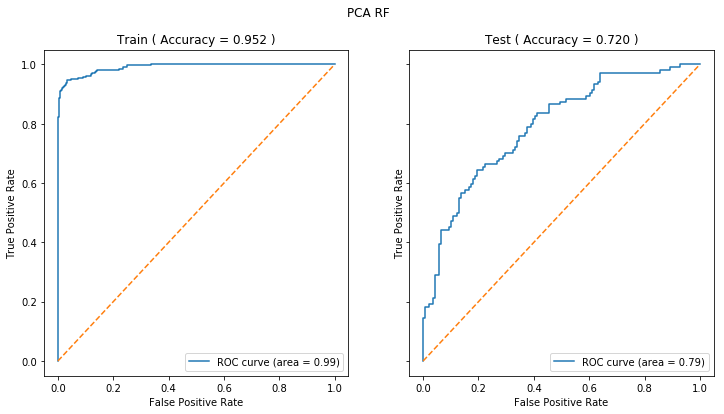

In [17]:
models_tree_pca = fit_dim_reduction_pipeline(pca, tree, dim_params, tree_params, X_std_train, y_train, n_iter=30)
print(models_tree_pca.best_estimator_)
plot_clf_roc(models_tree_pca.best_estimator_, X_std_train, y_train, X_std_test, y_test, 'PCA RF')

# MLCC

In [5]:
mlcc_results = []
filenames = []
for filename in os.listdir('./mlcc_results/'):
    if filename.endswith('.RData'):
        mlcc_results.append(tuple(read_mlcc_result(filename, 726)))
        filenames.append(filename)
print(filenames)
#segmentation, mBIC, dimensionalities = read_mlcc_result(100, 969)

['output500_8_40_30.RData', 'output500_1_40_30.RData', 'output50_4_40_30.RData', 'output50_8_40_30.RData', 'output100_8_40_30.RData', 'output250_1_40_30.RData', 'output150_8_40_30.RData', 'output25_50_40_30.RData', 'output100_4_40_30.RData', 'output10_8_40_30.RData', 'output75_4_40_30.RData', 'output20_4_40_30.RData', 'output20_8_40_30.RData', 'output200_8_40_30.RData']


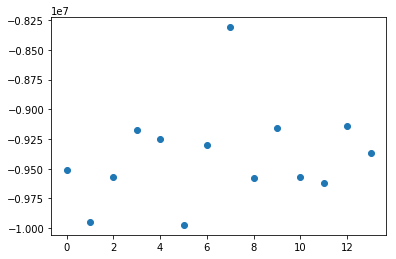

Highest mBIC is from output25_50_40_30.RData


In [6]:
mBICs = list(map(lambda x : x[1][0], mlcc_results))
plt.figure()
plt.scatter(np.arange(len(mBICs)), mBICs)
plt.show()
max_index = np.argmax(mBICs)
print('Highest mBIC is from {}'.format(filenames[max_index]))

In [7]:
segmentation = mlcc_results[max_index][0]
dimensionalities = mlcc_results[max_index][2]
print(segmentation, dimensionalities)
print(len(dimensionalities))

X_mlcc_train = apply_mlcc_dim_reduction(X_std_train, segmentation, dimensionalities)
X_mlcc_test = apply_mlcc_dim_reduction(X_std_test, segmentation, dimensionalities)

[16  4  4 ...  9  9  9] [ 6  7 13 35 42  9 36 25 13 17  9 40  6  4  4 26 42  4 12 16 12  7  6 12
  4]
25


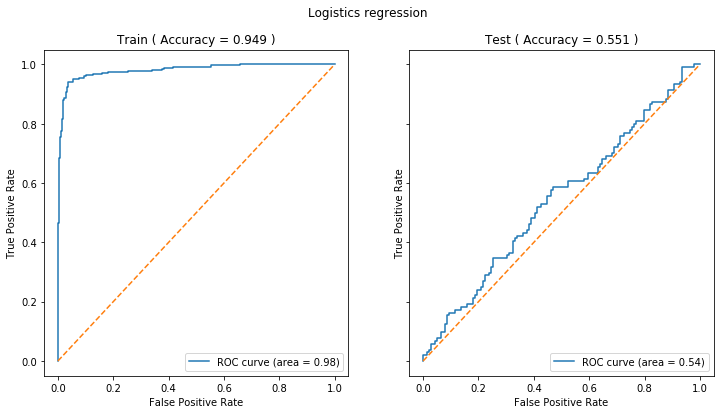

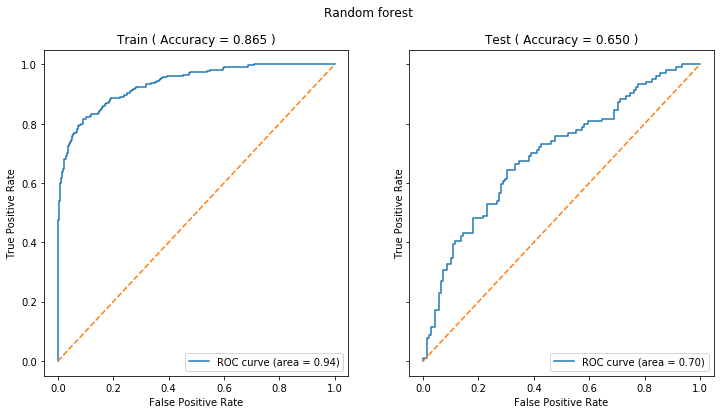

In [8]:
models = fit_models(X_mlcc_train, y_train, X_mlcc_test, y_test)

# SPCA

In [5]:
dim_params = {'n_components' : [100, 250, 500, 1000], 'threshold_val' : [0.01, 0.1, 0.5, 1, 3, 5, 10], 'threshold_mode': ['soft', 'hard', 'garrote']}
spca = SPCWrapper(max_iter=100)

/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Pipeline(memory=None,
     steps=[('dim', SPCWrapper(max_iter=100, n_components=1000, threshold_mode='soft',
      threshold_val=0.5)), ('clf', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])


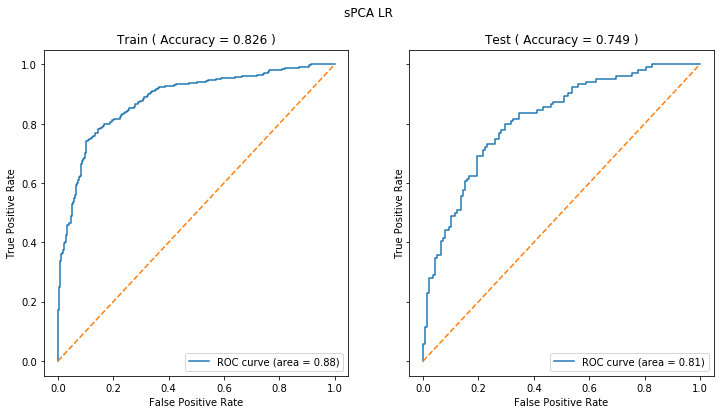

In [6]:
models_logit_spca = fit_dim_reduction_pipeline(spca, logit, dim_params, logit_params, X_std_train, y_train, n_iter=30)
print(models_logit_spca.best_estimator_)
plot_clf_roc(models_logit_spca.best_estimator_, X_std_train, y_train, X_std_test, y_test, 'sPCA LR')

In [ ]:
models_tree_spca = fit_dim_reduction_pipeline(spca, tree, dim_params, tree_params, X_std_train, y_train, n_iter=30)
print(models_tree_spca.best_estimator_)
plot_clf_roc(models_tree_spca.best_estimator_, X_std_train, y_train, X_std_test, y_test, 'sPCA RF')

In [5]:
dim_params = {'n_components' : [100, 250, 500, 1000]}
pls = PLSRegressionWrapper()

/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 108
  warnings.warn('Y residual constant at iteration %s' % k)


Pipeline(memory=None,
     steps=[('dim', PLSRegressionWrapper(copy=True, max_iter=500, n_components=1000, scale=True,
           tol=1e-06)), ('clf', LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])


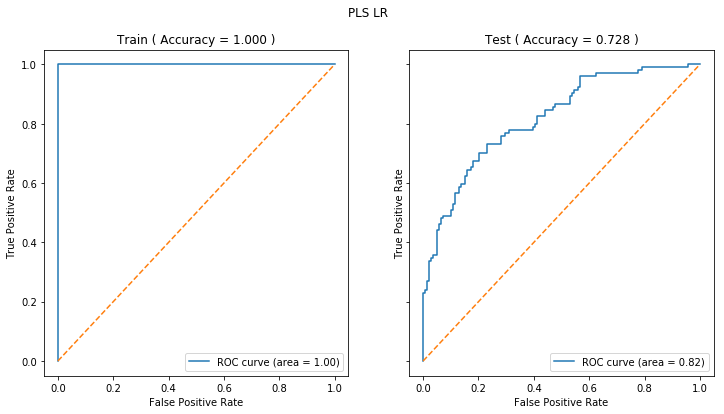

In [6]:
models_logit_pls = fit_dim_reduction_pipeline(pls, logit, dim_params, logit_params, X_std_train, y_train, n_iter=30)
print(models_logit_pls.best_estimator_)
plot_clf_roc(models_logit_pls.best_estimator_, X_std_train, y_train, X_std_test, y_test, 'PLS LR')

/pio/scratch/1/i272955/anaconda3/envs/master/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:291: UserWarning: Y residual constant at iteration 108
  warnings.warn('Y residual constant at iteration %s' % k)


Pipeline(memory=None,
     steps=[('dim', PLSRegressionWrapper(copy=True, max_iter=500, n_components=250, scale=True,
           tol=1e-06)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


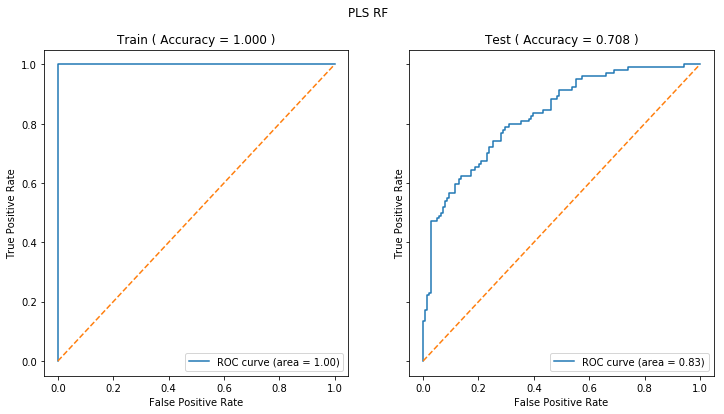

In [7]:
models_tree_pls = fit_dim_reduction_pipeline(pls, tree, dim_params, tree_params, X_std_train, y_train, n_iter=30)
print(models_tree_pls.best_estimator_)
plot_clf_roc(models_tree_pls.best_estimator_, X_std_train, y_train, X_std_test, y_test, 'PLS RF')